# Create Plots for SMBE2025

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import h5py
import matplotlib.cm as cm
import itertools as it
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/"
    #sys.path.append("/mnt/archgen/users/hringbauer/git/hapBLOCK/python3/")
    #sys.path.insert(0, "/mnt/archgen/users/hringbauer/git/hapBLOCK/package/")
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

sys.path.insert(0, "/mnt/archgen/users/hringbauer/git/hapBLOCK/package/")
from ancIBD.ibd_stats.ibd_sites_stats import * # Import all functions
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

hpc030
Leipzig Cluster detected!
/mnt/archgen/users/hringbauer
CPU Count: 128


# 0) Load Department IBD Data
Use data from Leipzig IBD run

In [32]:
v0_ibd ="10.0"
df_ibd_ind = pd.read_csv(f'/mnt/archgen/ibd_release/v{v0_ibd}/ibd220f.ind.{v0_ibd}.tsv', sep='\t')
df_ibd = pd.read_csv(f'/mnt/archgen/ibd_release/v{v0_ibd}/ibd220f.ibd.{v0_ibd}.tsv', sep='\t')
df_meta = pd.read_csv(f'/mnt/archgen/ibd_release/v{v0_ibd}/iid.ibd.meta.v{v0_ibd}_AADR.tsv', sep='\t')
df_meta2 = df_meta[df_meta['frac_gp'] > 0.7] ### IIDs with decent IBD calls (according to ancIBD paper)

# 1) Do Yamnaya and Corded Ware figures

### Extract Yamnaya and Corded Ware data

In [33]:
core_yamnaya_iid_unr = np.array(['I6715', 'I7486.SG', 'I0443', 'I10363', 'I6731.SG', 'I13813', 'I25161', 
                        'I10033', 'I0438', 'I0370', 'I5269.SG', 'I5272', 'I10362', 'I7490', 'I6733', 
                        'I12243', 'I3951.SG', 'I7488.SG', 'I11990', 'I3952', 'I7483.SG', 'I6728', 'I7487.SG', 
                        'I3388_enhanced', 'I6727.SG', 'I11840', 'I12242', 'I25160', 'I1450', 'I0231.SG', 'I3387', 
                        'I10565', 'I5273.DG', 'I6729', 'I5277.SG', 'I7489', 'I5279.SG', 'I11838', 'I6713', 'I11752', 
                        'I6730.SG', 'I8291', 'I2069', 'I0245.SG', 'I7479', 'I6703.SG', 'I20190', 'RISE511_noUDG.SG'])

for substring in [".SG", ".DG", "_noUDG"]:
    core_yamnaya_iid_unr = np.char.replace(core_yamnaya_iid_unr, substring, '')

### Corded Ware iids
cw_iid_unr = np.array(['pcw362_noUDG.SG', 'WG25chr_utigBOL003_2', 'VLI010', 
              'KON004', 'VLI007', 'VLI071', 'CAH010', 'WG25chr_utigNAU002_2', 'VLI020', 'pcw211_noUDG.SG', 
              'VLI067', 'VLI011', 'TRM006', 'STD002', 'WG25chr_utigHAL001_2', 'Gyvakarai1_10bp_noUDG', 
              'I7209', 'KO1002', 'I7207', 'STD001', 'I0104', 'I13467', 'PNL002', 'WG25chr_utigHAN004_2', 
              'I7208', 'RDV001', 'I7279', 'VLI017', 'I0103', 'WG25chr_utigHAN002_2', 'pcw061_noUDG.SG', 
              'pcw070_noUDG.SG', 'pcw361_noUDG.SG', 'OHR002', 'WG25chr_utigNAU001_2', 'WG25chr_utigVOR004_2', 
              'I6695', 'VLI016', 'CAH005', 'pcw040_noUDG.SG', 'I7280', 'N45_noUDG.SG', 'DRO001'])

for substring in [".SG", ".DG", "_noUDG"]:
    cw_iid_unr = np.char.replace(cw_iid_unr, substring, '')
    
dft = df_meta[df_meta["iid"].isin(core_yamnaya_iid_unr)]
print(f"Found {len(dft)}/{len(core_yamnaya_iid_unr)} Yamnaya")

idx = df_meta["iid"].isin(cw_iid_unr)
dft = df_meta[idx]
print(f"Found {len(dft)}/{len(cw_iid_unr)} Corded Ware")

### Screen what is missing
#idx = np.array([iid in df_meta["iid"].values for iid in core_yamnaya_iid_unr])
#core_yamnaya_iid_unr[~idx]
#df_meta[df_meta["iid"].str.contains('Gyvakarai1')]

Found 42/48 Yamnaya
Found 40/43 Corded Ware


Number of sample 1: 42
Number of relatives: 12
Filtered to 849/861 non-related iids (sum_IBD>12<100)
Number of sample 1: 40
Number of relatives: 0
Filtered to 780/780 non-related iids (sum_IBD>12<100)
Number of sample 1: 42
Number of sample 2: 40
Number of relatives: 0
Filtered to 1680/1680 non-related iids (sum_IBD>12<100)
Saved to ./dumpster/smbe2025/yam_cw_between_nofit.png


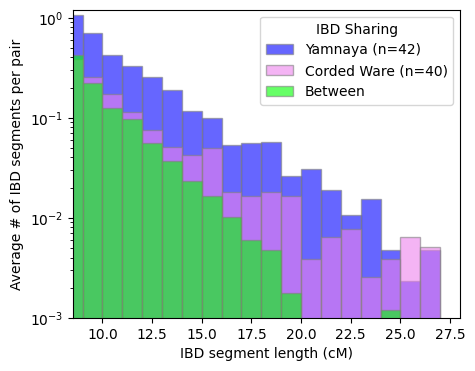

In [40]:
plot_ibd_2sites(
    df_ibd=df_ibd, df_ibd_ind=df_ibd_ind, df_meta=df_meta,
    site1= "Yamnaya (n=42)",  site2 = "Corded Ware (n=40)",  
    iids1=core_yamnaya_iid_unr, iids2=cw_iid_unr, min_cm=100,
    figsize = (5,4), bins = np.arange(8, 28, 1),  
    Ne_plot = [], # Diploid Pop Size
    c_plot = ["#5ec962", "#440154", "yellow", "sandybrown"],
    yscale="log", ylim_plot=[1e-3,1.2e0], xlim_plot=[8.5,28], 
    dts_a=0.75, dts_plot=[], c_dts=["brown", "orange", "#fde725", "brown"],
    savepath="./dumpster/smbe2025/yam_cw_between_nofit.png") #0,18,36

Number of sample 1: 42
Number of relatives: 12
Filtered to 849/861 non-related iids (sum_IBD>12<100)
Number of sample 1: 40
Number of relatives: 0
Filtered to 780/780 non-related iids (sum_IBD>12<100)
Number of sample 1: 42
Number of sample 2: 40
Number of relatives: 0
Filtered to 1680/1680 non-related iids (sum_IBD>12<100)
Saved to ./dumpster/smbe2025/yam_cw_between_fit.png


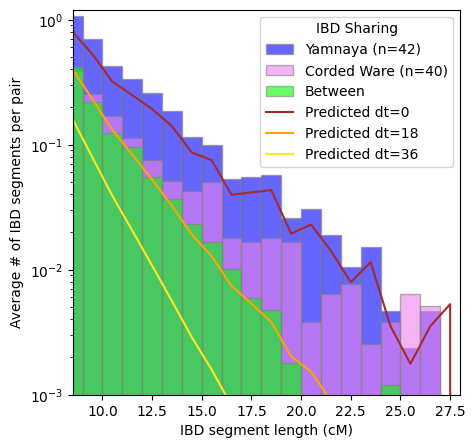

In [48]:
plot_ibd_2sites(
    df_ibd=df_ibd, df_ibd_ind=df_ibd_ind, df_meta=df_meta,
    site1= "Yamnaya (n=42)",  site2 = "Corded Ware (n=40)",  
    iids1=core_yamnaya_iid_unr, iids2=cw_iid_unr, min_cm=100,
    figsize = (5,5), bins = np.arange(8, 28, 1),  
    Ne_plot = [], # Diploid Pop Size
    c_plot = ["#5ec962", "#440154", "yellow", "sandybrown"],
    yscale="log", ylim_plot=[1e-3,1.2e0], xlim_plot=[8.5,28], 
    dts_a=0.75, dts_plot=[0,18,36], c_dts=["brown", "orange", "#fde725", "brown"],
    savepath="./dumpster/smbe2025/yam_cw_between_fit.png") #0,18,36

## 2) Fit alpha and delta_t

In [43]:
def ll_ibd_counts(counts, lambdas):
    """Calculate the LL likelihood of IBD counts when given expectations"""
    loglik_each_bin = counts * np.log(lambdas) - lambdas
    log_lik_tot = np.sum(loglik_each_bin) # Composite LL (sum all)
    return log_lik_tot
    
def fit_dt_a_ibd(df_ibd, df_ibd_ind, df_meta, bins=[],
                 site1="", site2="", iids1=[], iids2=[], min_cm=200,
                 te = 30, num_t = 31, a_list=np.linspace(0.1,1,10)):
    """Fit delta t and alpha. 
    site & iid 1/2: list of sites or iids to fit
    if iids given use those (and not site)
    min_cm: Cutoff of sum IBD to filter relatives
    df_ibd: Individual IBD segment dataframe
    df_ibd_ind: Summary IBD dataframe (used for filtering close relatives)
    df_meta: Meta files of iids ran for IBD (used for matching)
    bins: IBD segment length bins to use for fit [in Morgan]
    te: Highest dt value to calculate ([0,te])
    num_t: How many dft values to calculate (evenly spaced)
    a_list: List of alpha (admixture fraction) values to try
    Return ML estimates and CI object"""

    ### Get the empirical IBD histograms
    df_ibd1, npairs_1 = get_ibd_stats_unrelated(df_ibd_ind, df_ibd, df_meta, site1=site1, site2=site1, 
                                                iids1=iids1, iids2=iids1, min_cm=min_cm)
    df_ibd_across, npairs_across = get_ibd_stats_unrelated(df_ibd_ind, df_ibd, df_meta, site1=site1, site2=site2, 
                                                     iids1=iids1, iids2=iids2, min_cm=min_cm, output=False)

    ### Evolve forward in time
    p0 = get_ibd_sharing_prob(df_ibd1, bins=bins, n_pairs=npairs_1)
    ### Calculate IBD sharing forward (assuming 100% ancestry)
    P = calc_IBD_decay_delta_t(bins, p0, t0=0, te=te, num_t=num_t, a=1)

    ### Calculate across 
    p_across = get_ibd_sharing_prob(df_ibd_across, bins=bins, n_pairs=npairs_across)
    
    ##########################
    ### Calculate likelihoods
    mat_ll = np.zeros((num_t, len(a_list)))

    for i in range(num_t): 
        for j, a in enumerate(a_list):
            lambdas = P[i] * a
            #lambdas+=1e-12
            ### Ignore the first length bin (not modelled by trans matrix)
            ll = ll_ibd_counts(counts=p_across[80:201] * npairs_across, lambdas=lambdas[80:201] * npairs_across)
            mat_ll[i,j]=ll

    ### Find the MLE Value
    maxll = np.max(mat_ll)
    i1 = np.where(mat_ll == maxll)
    #i1 = i1[0][0]

    #CIregion = np.where(mat_ll >= maxll - 1.92)
    #Ne_CI = Ne_list[CIregionNe]
    
    #print(f'MLE Ne: {Ne_list[i1]} (95% CI: {np.min(Ne_CI)}-{np.max(Ne_CI)})')
    return mat_ll#, CIregion

def plot_ll_surface(mat_ll, xticks, yticks, delta_ll=30, figsize=(6,6), savepath=""):
    """Plot LL surface matrix
    mat_ll: 2D Matrix of LL to plot
    delta_ll: How much lower LL than MLE to plot as color [float]"""
    plt.figure(figsize=figsize)
    maxll = np.max(mat_ll)
    plt.imshow(mat_ll[:,:], interpolation='none', aspect="auto", vmin=maxll-delta_ll)
    plt.colorbar(orientation='vertical')
    ax=plt.gca()
    
    ### Tick business
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_xticklabels([str(round(float(l), 2)) for l in xticks], rotation=90)
    ax.set_xlabel("Admixture Fraction")
    
    ax.set_yticks(np.arange(len(yticks)))
    ax.set_yticklabels(yticks)
    ax.set_ylabel("Delta t")
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches='tight', dpi=600)
    
    plt.show()

def get_mle_ci_2Dllmat(mat_ll, args0, args1, output=True):
    """Get MLE & CIs for 2D Log Likelihood Matrix.
    x_vals, y_vals: The x and y Values"""

    maxll = np.max(mat_ll)
    idx_max = np.where(mat_ll == maxll)
    mle = np.array([args0[idx_max[0][0]], args1[idx_max[1][0]]])
    
    
    CIregion = np.where(mat_ll >= maxll - 1.92)

    x = args0[CIregion[0]]
    y = args1[CIregion[1]]

    cis_x = np.quantile(x, [0.025,0.975])
    cis_y = np.quantile(y, [0.025,0.975])
    cis = np.array([cis_x, cis_y])

    if output:
        print(f"MLE: {mle}")
        print(f"95% CIs: {cis}")

    return mle, cis, CIregion

### Test with Y-CW

In [44]:
mat_ll = fit_dt_a_ibd(df_ibd=df_ibd, df_ibd_ind=df_ibd_ind, df_meta=df_meta,
                     bins = np.linspace(0,1, 1001),
                     iids1=core_yamnaya_iid_unr, iids2=cw_iid_unr,
                     te = 30, num_t = 31, a_list=np.linspace(0.1,1.0,19))

#site1= "Yamnaya (n=29)",  site2 = "Cordscaleed Ware (n=27)",  
    

Number of sample 1: 42
Number of relatives: 5
Filtered to 856/861 non-related iids (sum_IBD>12<200)
Number of sample 1: 42
Number of sample 2: 40
Number of relatives: 0
Filtered to 1680/1680 non-related iids (sum_IBD>12<200)


In [85]:
np.linspace(0.1,1.0,19)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

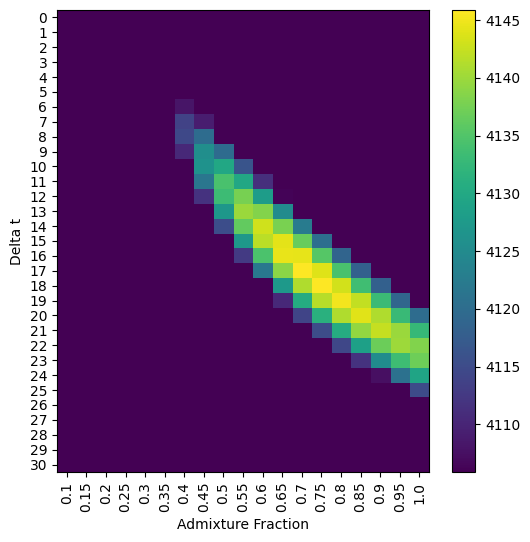

In [45]:
args1 = np.linspace(0.1,1.0,19)
args0 = np.linspace(0,30,31).astype('int')
plot_ll_surface(mat_ll, xticks=args1, yticks=args0, delta_ll=40, savepath="./dumpster/smbe2025/yam_cw_ll.png")

In [88]:
mle, cis, CIregion = get_mle_ci_2Dllmat(mat_ll, args0, args1)

MLE: [18.    0.75]
95% CIs: [[15.15   19.85  ]
 [ 0.65    0.8425]]


In [89]:
CIregion[0]

array([15, 16, 16, 17, 18, 19, 20])

In [90]:
CIregion[1]

array([11, 11, 12, 12, 13, 14, 15])

# B) Do IBD Segment Karyotype Plots

In [6]:
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df

## B1) Plot IBD Segments of various close relatives

In [3]:
v0="10.0"
df_ibd = pd.read_csv(f"/mnt/archgen/ibd_release/v{v0}/ibd220f.ibd.{v0}.tsv", sep="\t")
print(f"Loaded n={len(df_ibd)} IBD segments")

Loaded n=3647101 IBD segments


Found: 0 Pairs fitting in dataframe.

Saved figure to ./dumpster/smbe2025/no_IBD_karyo.png


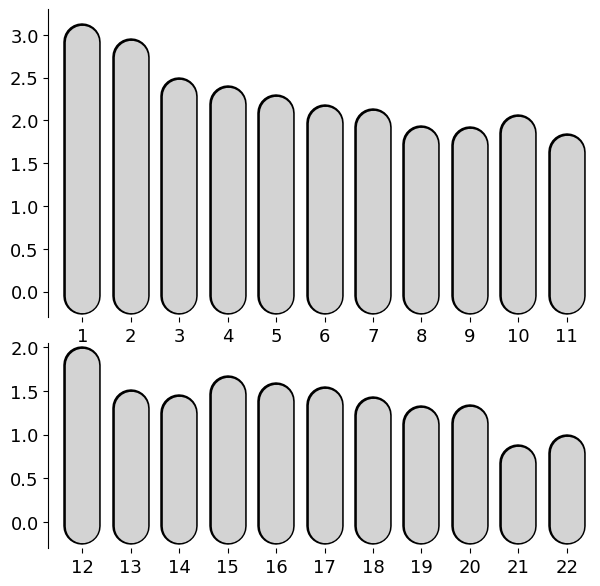

In [14]:
plot_karyo_from_ibd_df(df_ibd, iids=["hoe001", "HTA035"], min_cm=12,   #./dumpster/PTN_ZTM.ibd.png
                      c_back="lightgray", 	title="", savepath="./dumpster/smbe2025/no_IBD_karyo.png") 

Found: 1 Pairs fitting in dataframe.

Saved figure to ./dumpster/smbe2025/single_IBD_karyo.png


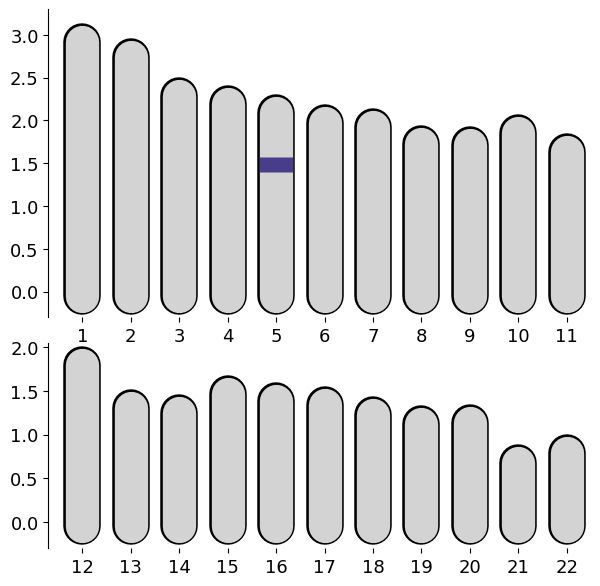

In [13]:
plot_karyo_from_ibd_df(df_ibd, iids=["hoe001", "DOG035"], min_cm=12,   #./dumpster/PTN_ZTM.ibd.png
                      c_back="lightgray", 	title="", savepath="./dumpster/smbe2025/single_IBD_karyo.png") 

# 3) Plot IBD figures of Ne

In [18]:
df_ibde= pd.read_csv('/mnt/archgen/users/yilei/Data/Eurasia_IBD/dataset/ibd220.ibd.v54.1.tsv', sep='\t')
# subset to segments > 8cm
df_ibde = df_ibde[df_ibde['lengthM'] >= 0.08]

core_yamnaya_iid_unr = ['I6715', 'I7486.SG', 'I0443', 'I10363', 'I6731.SG', 'I13813', 'I25161', 
                        'I10033', 'I0438', 'I0370', 'I5269.SG', 'I5272', 'I10362', 'I7490', 'I6733', 
                        'I12243', 'I3951.SG', 'I7488.SG', 'I11990', 'I3952', 'I7483.SG', 'I6728', 'I7487.SG', 
                        'I3388_enhanced', 'I6727.SG', 'I11840', 'I12242', 'I25160', 'I1450', 'I0231.SG', 'I3387', 
                        'I10565', 'I5273.DG', 'I6729', 'I5277.SG', 'I7489', 'I5279.SG', 'I11838', 'I6713', 'I11752', 
                        'I6730.SG', 'I8291', 'I2069', 'I0245.SG', 'I7479', 'I6703.SG', 'I20190', 'RISE511_noUDG.SG']

cw_iid_unr = ['pcw362_noUDG.SG', 'BOL003_noUDG.SG', 'VLI010', 
              'KON004', 'VLI007', 'VLI071', 'CAH010', 'NAU002_noUDG.SG', 'VLI020', 'pcw211_noUDG.SG', 
              'VLI067', 'VLI011', 'TRM006', 'STD002', 'HAL001_noUDG.SG', 'Gyvakarai1_10bp_noUDG', 
              'I7209', 'KO1002', 'I7207', 'STD001', 'I0104', 'I13467', 'PNL002', 'HAN004_noUDG.SG', 
              'I7208', 'RDV001', 'I7279', 'VLI017', 'I0103', 'HAN002_noUDG.SG', 'pcw061_noUDG.SG', 
              'pcw070_noUDG.SG', 'pcw361_noUDG.SG', 'OHR002', 'NAU001_noUDG.SG', 'VOR004_noUDG.SG', 
              'I6695', 'VLI016', 'CAH005', 'pcw040_noUDG.SG', 'I7280', 'N45_noUDG.SG', 'DRO001']

# subset the ibd data
df_ibd_yamnaya = df_ibde[df_ibde['iid1'].isin(core_yamnaya_iid_unr) & df_ibde['iid2'].isin(core_yamnaya_iid_unr)]
df_ibd_cw = df_ibde[df_ibde['iid1'].isin(cw_iid_unr) & df_ibde['iid2'].isin(cw_iid_unr)]

### HGS
iids_dog = ["MPR001", "AAT001", "DOG059", "DOG050", "DOG042", "DOG088", "DOG014", "DOG024", "DOG021"]
df_ibd_hgs = df_ibd[df_ibd['iid1'].isin(iids_dog) & df_ibd['iid2'].isin(iids_dog)]

################################ add St Polten ################################
#ibds_st_polten = np.load('/mnt/archgen/users/yilei/Data/Medieval/PTN/imputation/ibds.st_polten4plot.npy')
#npairs_st_polten = 780
#ibd_st_polten2, npairs_st_polten2 = get_ibd_stats_unrelated(df_ibd_ind, df_ibd, df_meta2, site1='PTN')
df_ibd_ptn, npairs_ptn = get_ibd_stats_unrelated(df_ibd_ind, df_ibd, df_meta2, site1='PTN')

Number of PTN samples: 129
Number of relatives: 15
Filtered to 8241/8256 non-related iids (sum_IBD>12<200)


In [8]:
len(cw_iid_unr)

43

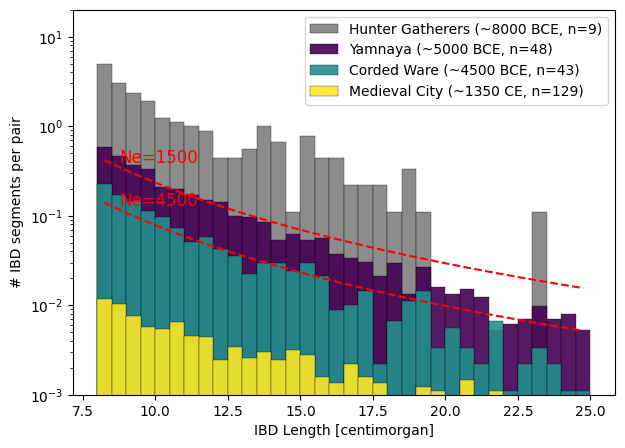

In [50]:
bins = np.arange(8, 25.1, 0.5)
binmidpoint = (bins[1:] + bins[:-1])/2
binwidth = bins[1] - bins[0]

ibds_yamnaya = 100*df_ibd_yamnaya['lengthM'].values
nyamnaya = len(core_yamnaya_iid_unr)
npairs_yamnaya = nyamnaya * (nyamnaya-1) / 2
ibds_cw = 100*df_ibd_cw['lengthM'].values
ncw = len(cw_iid_unr)
npairs_cw = ncw * (ncw-1) / 2
ibd_ptn = 100* df_ibd_ptn["lengthM"].values

ibds_hg = 100*df_ibd_hgs['lengthM'].values
npairs_hg = len(iids_dog)


cs = ["#440154", "#21908c", "#fde725"]
alpha= 0.9

plt.figure(figsize=(7,5))
ax = plt.gca()

plt.hist(ibds_hg, bins=bins, alpha=alpha, weights=np.ones_like(ibds_hg)/npairs_hg, 
         label='Hunter Gatherers (~8000 BCE, n=9)', edgecolor='k', linewidth=0.25, color="gray")

plt.hist(ibds_yamnaya, bins=bins, alpha=alpha, weights=np.ones_like(ibds_yamnaya)/npairs_yamnaya, 
         label='Yamnaya (~5000 BCE, n=48) ', edgecolor='k', linewidth=0.25, color=cs[0])
plt.hist(ibds_cw, bins=bins, alpha=alpha, weights=np.ones_like(ibds_cw)/npairs_cw, 
         label='Corded Ware (~4500 BCE, n=43)',  edgecolor='k', linewidth=0.25, color=cs[1])
plt.hist(ibd_ptn, bins=bins, alpha=alpha, weights=np.ones_like(ibd_ptn)/npairs_ptn, 
         label='Medieval City (~1350 CE, n=129)', edgecolor='k', linewidth=0.25, color=cs[2])


### Plot Expectation
e_roh = Expected_Roh()  # Get the object to do calculation

for N in [1500, 4500]:
    y = e_roh.roh_pdf_allchr_N(binmidpoint/100, N=2*N )*4*binwidth/100
    plt.plot(binmidpoint, y, color="red", linestyle='dashed')
    plt.text(binmidpoint[1], y[1], f"Ne={N}", color='red', fontsize=12, ha="left", va="bottom")

plt.legend(loc='upper right')
plt.xlabel('IBD Length [centimorgan]')
plt.ylabel('# IBD segments per pair')
plt.yscale('log')

ax.set_ylim([1e-3,2e1])
plt.savefig('./dumpster/smbe2025/ne_fits.png', bbox_inches='tight', dpi=600) #./erc/IBD_histo.pdf

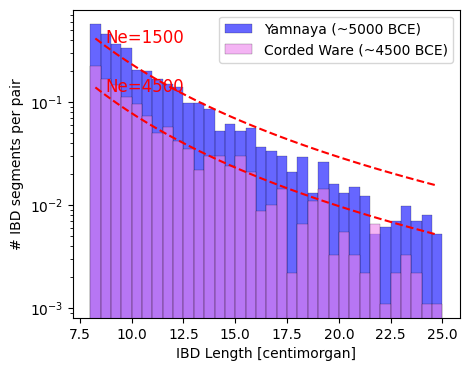

In [60]:
bins = np.arange(8, 25.1, 0.5)
binmidpoint = (bins[1:] + bins[:-1])/2
binwidth = bins[1] - bins[0]

ibds_yamnaya = 100*df_ibd_yamnaya['lengthM'].values
nyamnaya = len(core_yamnaya_iid_unr)
npairs_yamnaya = nyamnaya * (nyamnaya-1) / 2
ibds_cw = 100*df_ibd_cw['lengthM'].values
ncw = len(cw_iid_unr)
npairs_cw = ncw * (ncw-1) / 2
ibd_ptn = 100* df_ibd_ptn["lengthM"].values

ibds_hg = 100*df_ibd_hgs['lengthM'].values
npairs_hg = len(iids_dog)


cs = ["blue", "violet"]
alpha= 0.6

plt.figure(figsize=(5,4))
ax = plt.gca()

#plt.hist(ibds_hg, bins=bins, alpha=alpha, weights=np.ones_like(ibds_hg)/npairs_hg, 
#         label='Hunter Gatherers (~8000 BCE, n=9)', edgecolor='k', linewidth=0.25, color="gray")

plt.hist(ibds_yamnaya, bins=bins, alpha=alpha, weights=np.ones_like(ibds_yamnaya)/npairs_yamnaya, 
         label='Yamnaya (~5000 BCE) ', edgecolor='k', linewidth=0.25, color=cs[0])
plt.hist(ibds_cw, bins=bins, alpha=alpha, weights=np.ones_like(ibds_cw)/npairs_cw, 
         label='Corded Ware (~4500 BCE)',  edgecolor='k', linewidth=0.25, color=cs[1])
#plt.hist(ibd_ptn, bins=bins, alpha=alpha, weights=np.ones_like(ibd_ptn)/npairs_ptn, 
#         label='Medieval City (~1350 CE, n=129)', edgecolor='k', linewidth=0.25, color=cs[2])


### Plot Expectation
e_roh = Expected_Roh()  # Get the object to do calculation

for N in [1500, 4500]:
    y = e_roh.roh_pdf_allchr_N(binmidpoint/100, N=2*N )*4*binwidth/100
    plt.plot(binmidpoint, y, color="red", linestyle='dashed')
    plt.text(binmidpoint[1], y[1], f"Ne={N}", color='red', fontsize=12, ha="left", va="bottom")

plt.legend(loc='upper right')
plt.xlabel('IBD Length [centimorgan]')
plt.ylabel('# IBD segments per pair')
plt.yscale('log')

#ax.set_ylim([1.5e-2,2e0])
plt.savefig('./dumpster/smbe2025/ne_fits.png', bbox_inches='tight', dpi=600) #./erc/IBD_histo.pdf

In [29]:
df_meta2[df_meta2["iid"].str.contains("ZKU")]

,iid,frac_gp,frac_missing,frac_het,n_cov_snp,Archaeological_ID,Master_ID,Projects,Locality,Province,Country,Latitude,Longitude,date,date_type,imputation_type
3127,ZKU002,0.922841,0.032059,0.198989,719652.0,Zlaty-Kun skull,ZKU002,PrueferNatureEcologyEvolution2021,"Zlatý-kůň (Central Bohemian Region, Beroun ...",Prague,Czech Republic,49.9161725,14.0665849,-45000:-40000,Archaeological,Internal
